In [ ]:
# 기준size (512,512,1)

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from selenium.webdriver.common.keys import Keys

In [34]:
def make_mosaic(X,ratio=12,color=False):
    if not color:
        newX = np.zeros((np.array(X.shape)).astype(int))
        kernel = np.ones((ratio,ratio))

        for k in range(int(X.shape[0]/4),int(X.shape[0]/4)*3,ratio):
            for l in range(int(X.shape[1]/4),int(X.shape[1]/4)*3,ratio):
                mean = np.mean(X[k:k+ratio,l:l+ratio]*kernel)
                newX[k:k+ratio,l:l+ratio] = mean

        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                if int(X.shape[0]/4)<=i<3*int(X.shape[0]/4) and int(X.shape[1]/4)<=j<3*int(X.shape[1]/4):
                    continue
                else:
                    newX[i,j] = X[i,j]
    
    else:
        newX = np.zeros((np.array(X.shape)).astype(int))
        kernel = np.ones((ratio,ratio))

        for k in range(int(X.shape[0]/4),int(X.shape[0]/4)*3,ratio):
            for l in range(int(X.shape[1]/4),int(X.shape[1]/4)*3,ratio):
                for j in range(0,3):
                    mean = np.mean(X[k:k+ratio,l:l+ratio,j]*kernel)
                    newX[k:k+ratio,l:l+ratio,j] = mean

        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                for k in range(0,3):
                    if int(X.shape[0]/4)<=i<3*int(X.shape[0]/4) and int(X.shape[1]/4)<=j<3*int(X.shape[1]/4):
                        continue
                    else:
                        newX[i,j,k] = X[i,j,k]
    
    return newX/255.

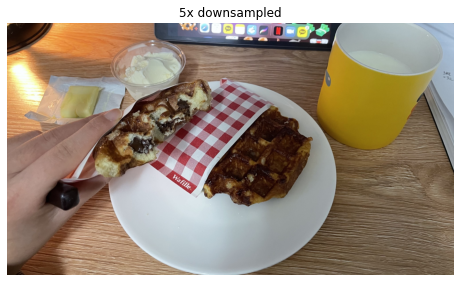

(2274, 4032, 3)


In [30]:
img = cv2.imread("1.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.title('5x downsampled')
plt.axis('off')
plt.show()
print(img.shape)

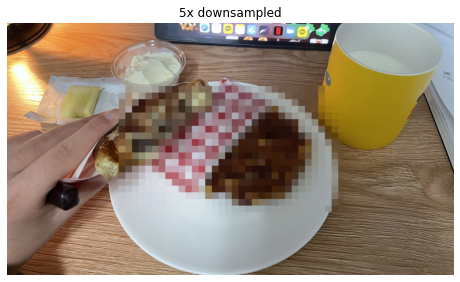

In [32]:
img = cv2.imread("1.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(make_mosaic(img,ratio=60)/255)
plt.title('5x downsampled')
plt.axis('off')
plt.show()

In [ ]:
img = cv2.imread("2.jpg",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(8,6))
plt.imshow(make_mosaic(img,ratio=60), cmap='gray')
plt.title('5x downsampled')
plt.axis('off')
plt.show()

In [ ]:
img = cv2.imread("3.jpg",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(8,6))
plt.imshow(make_mosaic(img,ratio=20), cmap='gray')
plt.title('5x downsampled')
plt.axis('off')
plt.show()

In [ ]:
ratio = 8
X = cv2.imread("my_picture.jpg",cv2.IMREAD_GRAYSCALE)
newX = np.zeros((np.array(X.shape)).astype(int))
kernel = np.ones((ratio,ratio))

for k in range(int(X.shape[0]/4),int(X.shape[0]/4)*3,ratio):
    for l in range(int(X.shape[1]/4),int(X.shape[1]/4)*3,ratio):
        mean = np.mean(X[k:k+ratio,l:l+ratio]*kernel)
        newX[k:k+ratio,l:l+ratio] = mean

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if int(X.shape[0]/4)<=i<3*int(X.shape[0]/4) and int(X.shape[1]/4)<=j<3*int(X.shape[1]/4):
            continue
        else:
            newX[i,j] = X[i,j]

plt.figure(figsize=(8,6))
plt.imshow(newX, cmap='gray')
plt.title('5x downsampled')
plt.axis('off')
plt.show()


In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
import time
import re 
import shutil
import os 

def save_img(directory,driver,count):
    html = driver.page_source
    soup = BeautifulSoup(html,'lxml')
    url = soup.select("div.image > img")[0].get('src')

    resp=requests.get(url,stream=True)
    filename = directory+'/test_{}.jpg'.format(str(count))
    local_file = open(filename,'wb')
    resp.raw.decode_content=True
    shutil.copyfileobj(resp.raw,local_file)
    return 

def next_to(driver):
    try:
        driver.find_element_by_xpath("//*[@id=\"main_pack\"]/section/div[2]/div[2]/div/div[1]/div[1]/div[2]/a[2]/i").click()
    except:
        try:
            driver.find_element_by_xpath("//*[@id=\"main_pack\"]/section/div/div[2]/div/div[1]/div[1]/div[2]/a[2]").click()
        except:
            driver.execute_script('window.scrollTo(0, 1);')
            driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    return

In [ ]:
len(keyword_list)

In [ ]:
'과일','매니큐어','휴지','달력','벤치프레스','턱걸이','러닝머신','자전거','마라톤','토익','수능','교복','고딩','네이버','파이썬','딥러닝','자바','아이유','한예슬','강민경','한지민','한채영','강다니엘','박정민','황정민','남주혁','박보검','이순재','이정재','정우성','원빈','김희철','손담비','김사랑','라미란','하지원','전원주','빌리아일리시','엠마왓슨','힐러리','패리스힐튼','레이디가가','에드시런','콜드플레이','마룬파이브','찰리푸스','톰크루즈','브루노마스','마이클잭슨','마이클조던','스테판커리','르브론제임스','듀아리파','아리아나그란데','제시','이효리','효린','아이돌'

'과일','매니큐어','휴지','달력','벤치프레스','턱걸이','러닝머신','자전거','마라톤','토익','수능','교복','고딩','네이버','파이썬','딥러닝','자바','아이유','한예슬','강민경','한지민','한채영','강다니엘','박정민','황정민','남주혁','박보검','이순재','이정재','정우성','원빈','김희철','손담비','김사랑','라미란','하지원','전원주','빌리아일리시','엠마왓슨','힐러리','패리스힐튼','레이디가가','에드시런','콜드플레이','마룬파이브','찰리푸스','톰크루즈','브루노마스','마이클잭슨','마이클조던','스테판커리','르브론제임스','듀아리파','아리아나그란데','제시','이효리','효린','아이돌',

In [ ]:
keyword_list=['커피','컴퓨터','구름','선풍기','에어컨','책','음료','카메라','안경','건물','집','자동차','템버린','햄버거','돌고래','커튼','접시','배게','가방','고양이','멍멍이','튜브','수박','경찰차','스피커','연필','볼펜','필통','과자','의자','총','여우','코끼리','곰','파인애플','복숭아','체리','테디베어','머그컵','거울','신발','드라이기','셔츠','리코더','악기','모자','축구공','손바닥','팔찌','반지','목걸이','귀걸이','케익','떡볶이','계란','라면','돼지','돈가스','고구마','아이스크림','감자','허수아비','튀김','파스타','치킨','리조또','랍스타','피자','포크','나이프','숟가락','샤워기','칫솔','신호등','유모차','삼각자','컴퍼스','와인','소주','맥주','귀마개','촛불','간판','핸드폰','테블릿','콘센트','시계','은행','돈','카드','지갑','상자','빔프로젝트','소화기','충전기','텀블러','수첩','립스틱','섀도우','시소','그네','미끄럼틀','트램펄린','정글집','철봉','평행봉','방석','뜀틀','농구공','테니스','골프공','야구공','수영모자','감자전','막걸리','패딩','눈사람','산타클로스','국기','나무','덤벨','과일','매니큐어','휴지','달력','벤치프레스','턱걸이','러닝머신','자전거','마라톤','토익','수능','교복','고딩','네이버','파이썬','딥러닝','자바','아이유','한예슬','강민경','한지민','한채영','강다니엘','박정민','황정민','남주혁','박보검','이순재','이정재','정우성','원빈','김희철','손담비','김사랑','라미란','하지원','전원주','빌리아일리시','엠마왓슨','힐러리','패리스힐튼','레이디가가','에드시런','콜드플레이','마룬파이브','찰리푸스','톰크루즈','브루노마스','마이클잭슨','마이클조던','스테판커리','르브론제임스','듀아리파','아리아나그란데','제시','이효리','효린','아이돌']
len(keyword_list)


In [ ]:
# keyword_list=['카페','꽃','커피','컴퓨터','구름','선풍기','에어컨','책','음료','카메라','안경','건물','집','자동차','템버린','햄버거','돌고래','커튼','접시','배게','가방','고양이','멍멍이','튜브','수박','경찰차','스피커','연필','볼펜','필통','과자','의자','총','여우','코끼리','곰','파인애플','복숭아','체리','테디베어','머그컵','거울','신발','드라이기','셔츠','리코더','악기','모자','축구공','손바닥','팔찌','반지','목걸이','귀걸이','케익','떡볶이','계란','라면','돼지','돈가스','고구마','아이스크림','감자','허수아비','튀김','파스타','치킨','리조또','랍스타','피자','포크','나이프','숟가락','샤워기','칫솔','신호등','유모차','삼각자','컴퍼스','와인','소주','맥주','귀마개','촛불','간판','핸드폰','테블릿','콘센트','시계','은행','돈','카드','지갑','상자','빔프로젝트','소화기','충전기','텀블러','수첩','립스틱','섀도우','시소','그네','미끄럼틀','트램펄린','정글집','철봉','평행봉','방석','뜀틀','농구공','테니스','골프공','야구공','수영모자','감자전','막걸리','패딩','눈사람','산타클로스','국기','나무','덤벨']
# '커피','컴퓨터','구름','선풍기','에어컨','책','음료','카메라','안경','건물','집','자동차','템버린','햄버거','돌고래','커튼','접시','배게','가방','고양이','멍멍이','튜브','수박','경찰차','스피커','연필','볼펜','필통','과자'
# keyword_list=['의자','총','여우','코끼리','곰','파인애플','복숭아','체리','테디베어','머그컵','거울','신발','드라이기','셔츠','리코더','악기','모자','축구공','손바닥','팔찌','반지','목걸이','귀걸이','케익','떡볶이','계란','라면','돼지','돈가스','고구마','아이스크림','감자','허수아비','튀김','파스타','치킨','리조또','랍스타','피자','포크','나이프','숟가락','샤워기','칫솔','신호등','유모차','삼각자','컴퍼스','와인','소주','맥주','귀마개','촛불','간판','핸드폰','테블릿','콘센트','시계','은행','돈','카드','지갑','상자','빔프로젝트','소화기','충전기','텀블러','수첩','립스틱','섀도우','시소','그네','미끄럼틀','트램펄린','정글집','철봉','평행봉','방석','뜀틀','농구공','테니스','골프공','야구공','수영모자','감자전','막걸리','패딩','눈사람','산타클로스','국기','나무','덤벨','과일','매니큐어','휴지','달력','벤치프레스','턱걸이','러닝머신','자전거','마라톤','토익','수능','교복','고딩','네이버','파이썬','딥러닝','자바','아이유','한예슬','강민경','한지민','한채영','강다니엘','박정민','황정민','남주혁','박보검','이순재','이정재','정우성','원빈','김희철','손담비','김사랑','라미란','하지원','전원주','빌리아일리시','엠마왓슨','힐러리','패리스힐튼','레이디가가','에드시런','콜드플레이','마룬파이브','찰리푸스','톰크루즈','브루노마스','마이클잭슨','마이클조던','스테판커리','르브론제임스','듀아리파','아리아나그란데','제시','이효리','효린','아이돌']
picture_num=100

for keyword in keyword_list:
    img_folder_path = 'G:/내 드라이브/P_project/raw_image/'

    driver = webdriver.Chrome()
    driver.get('https://search.naver.com/search.naver?where=image&sm=tab_jum&query={}'.format(keyword))
    time.sleep(3)
    driver.maximize_window()
    try:
        driver.find_element_by_xpath("//*[@id=\"main_pack\"]/section/div[2]/div[1]/div[1]/div[1]/div/div[1]/a").click()
    except:
        driver.find_element_by_xpath("//*[@id=\"main_pack\"]/section/div/div[1]/div[1]/div[1]/div/div[1]/a").click()
    html = driver.page_source
    soup = BeautifulSoup(html,'lxml')
    url = soup.select("div.image > img")[0].get('src')
    count=0
    scroll_count = 0


    if not os.path.isdir(img_folder_path+keyword): 
        os.mkdir(img_folder_path+keyword+"/")

    while count<=picture_num-1:
        save_img(img_folder_path+keyword,driver,count)
        next_to(driver)
        count+=1
        scroll_count+=1
        if scroll_count>=12:
            print(count)
            driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
            scroll_count=0
            time.sleep(10) 
        time.sleep(1)
    print(keyword," 완료")

In [4]:
keyword_list=['카페','꽃','커피','컴퓨터','구름','선풍기','에어컨','책','음료','카메라','안경','건물','집','자동차','템버린','햄버거','돌고래','커튼','접시','배게','가방','고양이','멍멍이','튜브','수박','경찰차','스피커','연필','볼펜','필통','과자','의자','총','여우','코끼리','곰','파인애플','복숭아','체리','테디베어','머그컵','거울','신발','드라이기','셔츠','리코더','악기','모자','축구공','손바닥','팔찌','반지','목걸이','귀걸이','케익','떡볶이','계란','라면','돼지','돈가스','고구마','아이스크림','감자','허수아비','튀김','파스타','치킨','리조또','랍스타','피자','포크','나이프','숟가락','샤워기','칫솔','신호등','유모차','삼각자','컴퍼스','와인','소주','맥주','귀마개','촛불','간판','핸드폰','테블릿','콘센트','시계','은행','돈','카드','지갑','상자','빔프로젝트','소화기','충전기','텀블러','수첩','립스틱','섀도우','시소','그네','미끄럼틀','트램펄린','정글집','철봉','평행봉','방석','뜀틀','농구공','테니스','골프공','야구공','수영모자','감자전','막걸리','패딩','눈사람','산타클로스','국기','나무','덤벨','의자','총','여우','코끼리','곰','파인애플','복숭아','체리','테디베어','머그컵','거울','신발','드라이기','셔츠','리코더','악기','모자','축구공','손바닥','팔찌','반지','목걸이','귀걸이','케익','떡볶이','계란','라면','돼지','돈가스','고구마','아이스크림','감자','허수아비','튀김','파스타','치킨','리조또','랍스타','피자','포크','나이프','숟가락','샤워기','칫솔','신호등','유모차','삼각자','컴퍼스','와인','소주','맥주','귀마개','촛불','간판','핸드폰','테블릿','콘센트','시계','은행','돈','카드','지갑','상자','빔프로젝트','소화기','충전기','텀블러','수첩','립스틱','섀도우','시소','그네','미끄럼틀','트램펄린','정글집','철봉','평행봉','방석','뜀틀','농구공','테니스','골프공','야구공','수영모자','감자전','막걸리','패딩','눈사람','산타클로스','국기','나무','덤벨','과일','매니큐어','휴지','달력','벤치프레스','턱걸이','러닝머신','자전거','마라톤','토익','수능','교복','고딩','네이버','파이썬','딥러닝','자바','아이유','한예슬','강민경','한지민','한채영','강다니엘','박정민','황정민','남주혁','박보검','이순재','이정재','정우성','원빈','김희철','손담비','김사랑','라미란','하지원','전원주','빌리아일리시','엠마왓슨','힐러리','패리스힐튼','레이디가가','에드시런','콜드플레이','마룬파이브','찰리푸스','톰크루즈','브루노마스','마이클잭슨','마이클조던','스테판커리','르브론제임스','듀아리파','아리아나그란데','제시','이효리','효린','아이돌']
keyword_list = list(set(keyword_list))
len(keyword_list)
keyword_list

['야구공',
 '라미란',
 '수박',
 '한예슬',
 '마이클조던',
 '패리스힐튼',
 '턱걸이',
 '칫솔',
 '톰크루즈',
 '악기',
 '철봉',
 '테니스',
 '러닝머신',
 '카메라',
 '뜀틀',
 '리조또',
 '상자',
 '가방',
 '감자전',
 '스테판커리',
 '접시',
 '빌리아일리시',
 '리코더',
 '총',
 '안경',
 '필통',
 '에어컨',
 '나이프',
 '그네',
 '컴퓨터',
 '아이스크림',
 '커튼',
 '소화기',
 '수첩',
 '반지',
 '르브론제임스',
 '과자',
 '숟가락',
 '고딩',
 '이효리',
 '아이돌',
 '치킨',
 '힐러리',
 '음료',
 '모자',
 '라면',
 '돼지',
 '소주',
 '마이클잭슨',
 '볼펜',
 '돌고래',
 '촛불',
 '튀김',
 '이순재',
 '커피',
 '국기',
 '배게',
 '떡볶이',
 '지갑',
 '머그컵',
 '선풍기',
 '여우',
 '엠마왓슨',
 '박보검',
 '정글집',
 '맥주',
 '경찰차',
 '복숭아',
 '계란',
 '매니큐어',
 '에드시런',
 '강다니엘',
 '휴지',
 '체리',
 '남주혁',
 '효린',
 '손담비',
 '덤벨',
 '황정민',
 '시소',
 '돈가스',
 '거울',
 '이정재',
 '튜브',
 '미끄럼틀',
 '목걸이',
 '자동차',
 '하지원',
 '고양이',
 '감자',
 '마라톤',
 '김희철',
 '트램펄린',
 '귀걸이',
 '멍멍이',
 '교복',
 '샤워기',
 '평행봉',
 '수영모자',
 '빔프로젝트',
 '텀블러',
 '방석',
 '김사랑',
 '충전기',
 '콜드플레이',
 '아이유',
 '한채영',
 '간판',
 '구름',
 '패딩',
 '테디베어',
 '건물',
 '시계',
 '레이디가가',
 '신발',
 '파스타',
 '포크',
 '신호등',
 '수능',
 '유모차',
 '토익',
 '강민경',
 '드라이기',
 '박정민',
 '파인애플',
 '은행',
 '햄버거',
 '산타

In [ ]:
keyword_list=['커피','컴퓨터','구름','선풍기','에어컨','책','음료','카메라','안경','건물','집','자동차','템버린','햄버거','돌고래','커튼','접시','배게','가방','고양이','멍멍이','튜브','수박','경찰차','스피커','연필','볼펜','필통','과자','의자','총','여우','코끼리','곰','파인애플','복숭아','체리','테디베어','머그컵','거울','신발','드라이기','셔츠','리코더','악기','모자','축구공','손바닥','팔찌','반지','목걸이','귀걸이','케익','떡볶이','계란','라면','돼지','돈가스','고구마','아이스크림','감자','허수아비','튀김','파스타','치킨','리조또','랍스타','피자','포크','나이프','숟가락','샤워기','칫솔','신호등','유모차','삼각자','컴퍼스','와인','소주','맥주','귀마개','촛불','간판','핸드폰','테블릿','콘센트','시계','은행','돈','카드','지갑','상자','빔프로젝트','소화기','충전기','텀블러','수첩','립스틱','섀도우','시소','그네','미끄럼틀','트램펄린','정글집','철봉','평행봉','방석','뜀틀','농구공','테니스','골프공','야구공','수영모자','감자전','막걸리','패딩','눈사람','산타클로스','국기','나무','덤벨','과일','매니큐어','휴지','달력','벤치프레스','턱걸이','러닝머신','자전거','마라톤','토익','수능','교복','고딩','네이버','파이썬','딥러닝','자바','아이유','한예슬','강민경','한지민','한채영','강다니엘','박정민','황정민','남주혁','박보검','이순재','이정재','정우성','원빈','김희철','손담비','김사랑','라미란','하지원','전원주','빌리아일리시','엠마왓슨','힐러리','패리스힐튼','레이디가가','에드시런','콜드플레이','마룬파이브','찰리푸스','톰크루즈','브루노마스','마이클잭슨','마이클조던','스테판커리','르브론제임스','듀아리파','아리아나그란데','제시','이효리','효린','아이돌']

In [3]:
# keyword_list=['카페','꽃','커피','컴퓨터','구름','선풍기','에어컨','책','음료','카메라','안경','건물','집','자동차','템버린','햄버거','돌고래','커튼','접시','배게','가방','고양이','멍멍이','튜브','수박','경찰차','스피커','연필','볼펜','필통','과자','의자','총','여우','코끼리','곰','파인애플','복숭아','체리','테디베어','머그컵','거울','신발','드라이기','셔츠','리코더','악기','모자','축구공','손바닥','팔찌','반지','목걸이','귀걸이','케익','떡볶이','계란','라면','돼지','돈가스','고구마','아이스크림','감자','허수아비','튀김','파스타','치킨','리조또','랍스타','피자','포크','나이프','숟가락','샤워기','칫솔','신호등','유모차','삼각자','컴퍼스','와인','소주','맥주','귀마개','촛불','간판','핸드폰','테블릿','콘센트','시계','은행','돈','카드','지갑','상자','빔프로젝트','소화기','충전기','텀블러','수첩','립스틱','섀도우','시소','그네','미끄럼틀','트램펄린','정글집','철봉','평행봉','방석','뜀틀','농구공','테니스','골프공','야구공','수영모자','감자전','막걸리','패딩','눈사람','산타클로스','국기','나무','덤벨']
filepath = "G:/내 드라이브/P_project/"
npy_x = []
npy_y = []
count=0
imsize=256
ratio=6
for keyword in keyword_list:
    print(keyword," 진행중...")
    for i in range(1,100):
        try:
            file = filepath+"raw_image/"+keyword+"/test_{}.jpg".format(i)
            # pre_img = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
            pre_img = np.fromfile(file,np.uint8)
            pre_img = cv2.imdecode(pre_img,cv2.IMREAD_GRAYSCALE)
            y_img = cv2.resize(pre_img,dsize=(imsize,imsize))
            x_img = make_mosaic(y_img,ratio=ratio)
            npy_x.append(x_img)
            npy_y.append(y_img)
            s_count = str(count)
            zero = 5-len(s_count)
            cv2.imwrite("./datasets"+"/train_x/x_{}_{}_{}.jpg".format("0"*zero+s_count,str(imsize),str(ratio)),x_img)
            cv2.imwrite("./datasets"+"/train_y/y_{}_{}_{}.jpg".format("0"*zero+s_count,str(imsize),str(ratio)),y_img)
            count+=1
        except:
            continue
    print(keyword," 완료")
    print(((keyword_list.index(keyword)+1)/len(keyword_list))*100,"% 진행")
npy_x = np.array(npy_x).reshape(-1,imsize,imsize,1)
npy_y = np.array(npy_y).reshape(-1,imsize,imsize,1)
np.save(filepath+"datasets/npy/npy_x_{}_{}.npy".format(str(imsize),str(ratio)),arr=npy_x)
np.save(filepath+"datasets/npy/npy_y_{}_{}.npy".format(str(imsize),str(ratio)),arr=npy_y)

NameError: name 'keyword_list' is not defined

In [ ]:
# keyword_list=['카페','꽃','커피','컴퓨터','구름','선풍기','에어컨','책','음료','카메라','안경','건물','집','자동차','템버린','햄버거','돌고래','커튼','접시','배게','가방','고양이','멍멍이','튜브','수박','경찰차','스피커','연필','볼펜','필통','과자','의자','총','여우','코끼리','곰','파인애플','복숭아','체리','테디베어','머그컵','거울','신발','드라이기','셔츠','리코더','악기','모자','축구공','손바닥','팔찌','반지','목걸이','귀걸이','케익','떡볶이','계란','라면','돼지','돈가스','고구마','아이스크림','감자','허수아비','튀김','파스타','치킨','리조또','랍스타','피자','포크','나이프','숟가락','샤워기','칫솔','신호등','유모차','삼각자','컴퍼스','와인','소주','맥주','귀마개','촛불','간판','핸드폰','테블릿','콘센트','시계','은행','돈','카드','지갑','상자','빔프로젝트','소화기','충전기','텀블러','수첩','립스틱','섀도우','시소','그네','미끄럼틀','트램펄린','정글집','철봉','평행봉','방석','뜀틀','농구공','테니스','골프공','야구공','수영모자','감자전','막걸리','패딩','눈사람','산타클로스','국기','나무','덤벨']
filepath = "G:/내 드라이브/P_project/"
npy_x = []
npy_y = []
count=0
imsize=256
ratio=8
for keyword in keyword_list:
    print(keyword," 진행중...")
    for i in range(1,100):
        try:
            file = filepath+"raw_image/"+keyword+"/test_{}.jpg".format(i)
            # pre_img = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
            pre_img = np.fromfile(file,np.uint8)
            pre_img = cv2.imdecode(pre_img,cv2.IMREAD_GRAYSCALE)
            y_img = cv2.resize(pre_img,dsize=(imsize,imsize))
            x_img = make_mosaic(y_img,ratio=ratio)
            npy_x.append(x_img)
            npy_y.append(y_img)
            s_count = str(count)
            zero = 5-len(s_count)
            cv2.imwrite("./datasets"+"/train_x/x_{}_{}_{}.jpg".format("0"*zero+s_count,str(imsize),str(ratio)),x_img)
            cv2.imwrite("./datasets"+"/train_y/y_{}_{}_{}.jpg".format("0"*zero+s_count,str(imsize),str(ratio)),y_img)
            count+=1
        except:
            continue
    print(keyword," 완료")
    print(((keyword_list.index(keyword)+1)/len(keyword_list))*100,"% 진행")
npy_x = np.array(npy_x).reshape(-1,imsize,imsize,1)
npy_y = np.array(npy_y).reshape(-1,imsize,imsize,1)
np.save(filepath+"datasets/npy/npy_x_{}_{}.npy".format(str(imsize),str(ratio)),arr=npy_x)
np.save(filepath+"datasets/npy/npy_y_{}_{}.npy".format(str(imsize),str(ratio)),arr=npy_y)

In [ ]:
# keyword_list=['카페','꽃','커피','컴퓨터','구름','선풍기','에어컨','책','음료','카메라','안경','건물','집','자동차','템버린','햄버거','돌고래','커튼','접시','배게','가방','고양이','멍멍이','튜브','수박','경찰차','스피커','연필','볼펜','필통','과자','의자','총','여우','코끼리','곰','파인애플','복숭아','체리','테디베어','머그컵','거울','신발','드라이기','셔츠','리코더','악기','모자','축구공','손바닥','팔찌','반지','목걸이','귀걸이','케익','떡볶이','계란','라면','돼지','돈가스','고구마','아이스크림','감자','허수아비','튀김','파스타','치킨','리조또','랍스타','피자','포크','나이프','숟가락','샤워기','칫솔','신호등','유모차','삼각자','컴퍼스','와인','소주','맥주','귀마개','촛불','간판','핸드폰','테블릿','콘센트','시계','은행','돈','카드','지갑','상자','빔프로젝트','소화기','충전기','텀블러','수첩','립스틱','섀도우','시소','그네','미끄럼틀','트램펄린','정글집','철봉','평행봉','방석','뜀틀','농구공','테니스','골프공','야구공','수영모자','감자전','막걸리','패딩','눈사람','산타클로스','국기','나무','덤벨']
filepath = "G:/내 드라이브/P_project/"
npy_x = []
npy_y = []
count=0
imsize=256
ratio=4
for keyword in keyword_list:
    print(keyword," 진행중...")
    for i in range(1,100):
        try:
            file = filepath+"raw_image/"+keyword+"/test_{}.jpg".format(i)
            # pre_img = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
            pre_img = np.fromfile(file,np.uint8)
            pre_img = cv2.imdecode(pre_img,cv2.IMREAD_GRAYSCALE)
            y_img = cv2.resize(pre_img,dsize=(imsize,imsize))
            x_img = make_mosaic(y_img,ratio=ratio)
            npy_x.append(x_img)
            npy_y.append(y_img)
            s_count = str(count)
            zero = 5-len(s_count)
            cv2.imwrite("./datasets"+"/train_x/x_{}_{}_{}.jpg".format("0"*zero+s_count,str(imsize),str(ratio)),x_img)
            cv2.imwrite("./datasets"+"/train_y/y_{}_{}_{}.jpg".format("0"*zero+s_count,str(imsize),str(ratio)),y_img)
            count+=1
        except:
            continue
    print(keyword," 완료")
    print(((keyword_list.index(keyword)+1)/len(keyword_list))*100,"% 진행")
npy_x = np.array(npy_x).reshape(-1,imsize,imsize,1)
npy_y = np.array(npy_y).reshape(-1,imsize,imsize,1)
np.save(filepath+"datasets/npy/npy_x_{}_{}.npy".format(str(imsize),str(ratio)),arr=npy_x)
np.save(filepath+"datasets/npy/npy_y_{}_{}.npy".format(str(imsize),str(ratio)),arr=npy_y)

In [ ]:
# keyword_list=['카페','꽃','커피','컴퓨터','구름','선풍기','에어컨','책','음료','카메라','안경','건물','집','자동차','템버린','햄버거','돌고래','커튼','접시','배게','가방','고양이','멍멍이','튜브','수박','경찰차','스피커','연필','볼펜','필통','과자','의자','총','여우','코끼리','곰','파인애플','복숭아','체리','테디베어','머그컵','거울','신발','드라이기','셔츠','리코더','악기','모자','축구공','손바닥','팔찌','반지','목걸이','귀걸이','케익','떡볶이','계란','라면','돼지','돈가스','고구마','아이스크림','감자','허수아비','튀김','파스타','치킨','리조또','랍스타','피자','포크','나이프','숟가락','샤워기','칫솔','신호등','유모차','삼각자','컴퍼스','와인','소주','맥주','귀마개','촛불','간판','핸드폰','테블릿','콘센트','시계','은행','돈','카드','지갑','상자','빔프로젝트','소화기','충전기','텀블러','수첩','립스틱','섀도우','시소','그네','미끄럼틀','트램펄린','정글집','철봉','평행봉','방석','뜀틀','농구공','테니스','골프공','야구공','수영모자','감자전','막걸리','패딩','눈사람','산타클로스','국기','나무','덤벨']
filepath = "G:/내 드라이브/P_project/"
npy_x = []
npy_y = []
count=0
imsize=128
ratio=4
for keyword in keyword_list:
    print(keyword," 진행중...")
    for i in range(1,100):
        try:
            file = filepath+"raw_image/"+keyword+"/test_{}.jpg".format(i)
            # pre_img = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
            pre_img = np.fromfile(file,np.uint8)
            pre_img = cv2.imdecode(pre_img,cv2.IMREAD_GRAYSCALE)
            y_img = cv2.resize(pre_img,dsize=(imsize,imsize))
            x_img = make_mosaic(y_img,ratio=ratio)
            npy_x.append(x_img)
            npy_y.append(y_img)
            s_count = str(count)
            zero = 5-len(s_count)
            cv2.imwrite("./datasets"+"/train_x/x_{}_{}_{}.jpg".format("0"*zero+s_count,str(imsize),str(ratio)),x_img)
            cv2.imwrite("./datasets"+"/train_y/y_{}_{}_{}.jpg".format("0"*zero+s_count,str(imsize),str(ratio)),y_img)
            count+=1
        except:
            continue
    print(keyword," 완료")
    print(((keyword_list.index(keyword)+1)/len(keyword_list))*100,"% 진행")
npy_x = np.array(npy_x).reshape(-1,imsize,imsize,1)
npy_y = np.array(npy_y).reshape(-1,imsize,imsize,1)
np.save(filepath+"datasets/npy/npy_x_{}_{}.npy".format(str(imsize),str(ratio)),arr=npy_x)
np.save(filepath+"datasets/npy/npy_y_{}_{}.npy".format(str(imsize),str(ratio)),arr=npy_y)

In [ ]:
# keyword_list=['카페','꽃','커피','컴퓨터','구름','선풍기','에어컨','책','음료','카메라','안경','건물','집','자동차','템버린','햄버거','돌고래','커튼','접시','배게','가방','고양이','멍멍이','튜브','수박','경찰차','스피커','연필','볼펜','필통','과자','의자','총','여우','코끼리','곰','파인애플','복숭아','체리','테디베어','머그컵','거울','신발','드라이기','셔츠','리코더','악기','모자','축구공','손바닥','팔찌','반지','목걸이','귀걸이','케익','떡볶이','계란','라면','돼지','돈가스','고구마','아이스크림','감자','허수아비','튀김','파스타','치킨','리조또','랍스타','피자','포크','나이프','숟가락','샤워기','칫솔','신호등','유모차','삼각자','컴퍼스','와인','소주','맥주','귀마개','촛불','간판','핸드폰','테블릿','콘센트','시계','은행','돈','카드','지갑','상자','빔프로젝트','소화기','충전기','텀블러','수첩','립스틱','섀도우','시소','그네','미끄럼틀','트램펄린','정글집','철봉','평행봉','방석','뜀틀','농구공','테니스','골프공','야구공','수영모자','감자전','막걸리','패딩','눈사람','산타클로스','국기','나무','덤벨']
filepath = "G:/내 드라이브/P_project/"
npy_x = []
npy_y = []
count=0
imsize=128
ratio=2
for keyword in keyword_list:
    print(keyword," 진행중...")
    for i in range(1,100):
        try:
            file = filepath+"raw_image/"+keyword+"/test_{}.jpg".format(i)
            # pre_img = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
            pre_img = np.fromfile(file,np.uint8)
            pre_img = cv2.imdecode(pre_img,cv2.IMREAD_GRAYSCALE)
            y_img = cv2.resize(pre_img,dsize=(imsize,imsize))
            x_img = make_mosaic(y_img,ratio=ratio)
            npy_x.append(x_img)
            npy_y.append(y_img)
            s_count = str(count)
            zero = 5-len(s_count)
            cv2.imwrite("./datasets"+"/train_x/x_{}_{}_{}.jpg".format("0"*zero+s_count,str(imsize),str(ratio)),x_img)
            cv2.imwrite("./datasets"+"/train_y/y_{}_{}_{}.jpg".format("0"*zero+s_count,str(imsize),str(ratio)),y_img)
            count+=1
        except:
            continue    
    print(keyword," 완료")
    print(((keyword_list.index(keyword)+1)/len(keyword_list))*100,"% 진행")
npy_x = np.array(npy_x).reshape(-1,imsize,imsize,1)
npy_y = np.array(npy_y).reshape(-1,imsize,imsize,1)
np.save(filepath+"datasets/npy/npy_x_{}_{}.npy".format(str(imsize),str(ratio)),arr=npy_x)
np.save(filepath+"datasets/npy/npy_y_{}_{}.npy".format(str(imsize),str(ratio)),arr=npy_y)

In [ ]:
len(keyword_list)

In [ ]:
# keyword_list=['카페','꽃','커피','컴퓨터','구름','선풍기','에어컨','책','음료','카메라','안경','건물','집','자동차','템버린','햄버거','돌고래','커튼','접시','배게','가방','고양이','멍멍이','튜브','수박','경찰차','스피커','연필','볼펜','필통','과자','의자','총','여우','코끼리','곰','파인애플','복숭아','체리','테디베어','머그컵','거울','신발','드라이기','셔츠','리코더','악기','모자','축구공','손바닥','팔찌','반지','목걸이','귀걸이','케익','떡볶이','계란','라면','돼지','돈가스','고구마','아이스크림','감자','허수아비','튀김','파스타','치킨','리조또','랍스타','피자','포크','나이프','숟가락','샤워기','칫솔','신호등','유모차','삼각자','컴퍼스','와인','소주','맥주','귀마개','촛불','간판','핸드폰','테블릿','콘센트','시계','은행','돈','카드','지갑','상자','빔프로젝트','소화기','충전기','텀블러','수첩','립스틱','섀도우','시소','그네','미끄럼틀','트램펄린','정글집','철봉','평행봉','방석','뜀틀','농구공','테니스','골프공','야구공','수영모자','감자전','막걸리','패딩','눈사람','산타클로스','국기','나무','덤벨']
filepath = "G:/내 드라이브/P_project/"
npy_x = []
npy_y = []
count=0
imsize=64
ratio=2
for keyword in keyword_list:
    print(keyword," 진행중...")
    for i in range(1,100):
        try:
            file = filepath+"raw_image/"+keyword+"/test_{}.jpg".format(i)
            # pre_img = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
            pre_img = np.fromfile(file,np.uint8)
            pre_img = cv2.imdecode(pre_img,cv2.IMREAD_GRAYSCALE)
            y_img = cv2.resize(pre_img,dsize=(imsize,imsize))
            x_img = make_mosaic(y_img,ratio=ratio)
            npy_x.append(x_img)
            npy_y.append(y_img)
            s_count = str(count)
            zero = 5-len(s_count)
            cv2.imwrite("./datasets"+"/train_x/x_{}_{}_{}.jpg".format("0"*zero+s_count,str(imsize),str(ratio)),x_img)
            cv2.imwrite("./datasets"+"/train_y/y_{}_{}_{}.jpg".format("0"*zero+s_count,str(imsize),str(ratio)),y_img)
            count+=1
        except:
            continue    
    print(keyword," 완료")
    print(((keyword_list.index(keyword)+1)/len(keyword_list))*100,"% 진행")
npy_x = np.array(npy_x).reshape(-1,imsize,imsize,1)
npy_y = np.array(npy_y).reshape(-1,imsize,imsize,1)
np.save(filepath+"datasets/npy/npy_x_{}_{}.npy".format(str(imsize),str(ratio)),arr=npy_x)
np.save(filepath+"datasets/npy/npy_y_{}_{}.npy".format(str(imsize),str(ratio)),arr=npy_y)

In [ ]:
x = np.load("./datasets/npy/npy_x_256_4.npy")
y = np.load("./datasets/npy/npy_y_256_4.npy")

In [ ]:
x.shape,y.shape

In [ ]:
int(x.shape[1]/4)

In [ ]:
x[:,int(x.shape[1]/4):3*int(x.shape[1]/4),int(x.shape[2]/4):3*int(x.shape[2]/4),:].shape

In [ ]:
k+=130
plt.imshow(x[k])

In [ ]:
plt.imshow(y[k])

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("./datasets/models/basic_dense.h5")
x_test = np.load("./datasets/npy/npy_x_64_2.npy")
y_pred = model.predict(x_test)

In [ ]:
k=-1

In [ ]:
k+=270
plt.imshow(x_test[k])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.load("./datasets/npy/npy_x_192_6.npy")
y = np.load("./datasets/npy/npy_y_192_6.npy")

In [ ]:
k = np.random.randint(0,17600)
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.title("Mosaic image")
plt.imshow(x[k],cmap='gray')
plt.subplot(1,2,2)
plt.title("None Mosaic image")
plt.imshow(y[k],cmap='gray')
plt.show()

In [ ]:
plt.imshow(y_pred[k])